In [2]:
from geojson import Feature, Point, FeatureCollection
from shapely.geometry import Polygon, LineString, LinearRing
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
import shapely
import geojson
import subprocess
import folium
import pyproj

C:\Users\DELL\Anaconda3\lib\site-packages\geopandas\_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.



In [3]:
data = "data.geojson"
geodata = geojson.load(open(data))
# type(geodata)
# geodata

In [4]:
tmp_lists = []

for i in range(0, len(geodata['features'])):
    if i!=9:
        for j in range(0, len(geodata['features'][i]['geometry']["coordinates"])):
            if len(geodata['features'][i]['geometry']["coordinates"][j]) >= 3:
                tmp_lists.append(
                      {
                        'Slabel': geodata['features'][i]['properties']['Slabel'],
                        'Plabel': geodata['features'][i]['properties']['Plabel'],
                        'geometry' : Polygon(geodata['features'][i]['geometry']["coordinates"][j])
                       }
                    )
            else:
                pass
    else:
        if geodata['features'][i]['properties']['Plabel'] ==1:
            for j in range(0, len(geodata['features'][i]['geometry']["coordinates"])):
                if len(geodata['features'][i]['geometry']["coordinates"][j]) >= 3:
                    tmp_lists.append(
                          {
                            'Slabel': geodata['features'][i]['properties']['Slabel'],
                            'Plabel': geodata['features'][i]['properties']['Plabel'],
                            'geometry' : Polygon(geodata['features'][i]['geometry']["coordinates"][j])
                           }
                        )
               
           
# tmp_lists
# len(geodata['features'][1]['geometry']["coordinates"][63])
# geodata['features'][1]['geometry']["coordinates"][63]

In [5]:
# len(geodata['features'][9]['geometry']["coordinates"][139])
# len(geodata['features'][12]['geometry']["coordinates"])
len(geodata['features'][9]['geometry']["coordinates"])
# geodata['features'][9]['geometry']["coordinates"][0]

dats = geodata
dat = dats['features'][9]['geometry']["coordinates"]



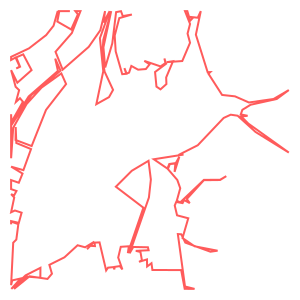

In [6]:
dat= LinearRing(geodata['features'][9]['geometry']["coordinates"][0])
dat

In [7]:
# geodata['features'][2]['geometry']["coordinates"]
# geodata['features'][1]['geometry']["coordinates"][55]

In [8]:
gdf = gpd.GeoDataFrame(tmp_lists)
gdf.index = np.arange(1, len(gdf) + 1) # setting the index to start from 1

gdf = gdf.set_crs('epsg:32631')
gdf

,Slabel,Plabel,geometry
1,42,4,"POLYGON ((485086.750 4643117.550, 485086.050 4..."
2,42,4,"POLYGON ((485254.050 4642396.550, 485251.950 4..."
3,42,4,"POLYGON ((485154.650 4642750.050, 485154.650 4..."
4,42,4,"POLYGON ((485033.550 4642970.550, 485033.550 4..."
5,42,4,"POLYGON ((485088.850 4642894.950, 485088.850 4..."
...,...,...,...
646,52,5,"POLYGON ((485163.750 4642361.550, 485162.350 4..."
647,52,5,"POLYGON ((485291.850 4643207.150, 485284.850 4..."
648,52,5,"POLYGON ((485257.550 4642409.850, 485256.850 4..."
649,52,5,"POLYGON ((485221.150 4643184.750, 485221.150 4..."


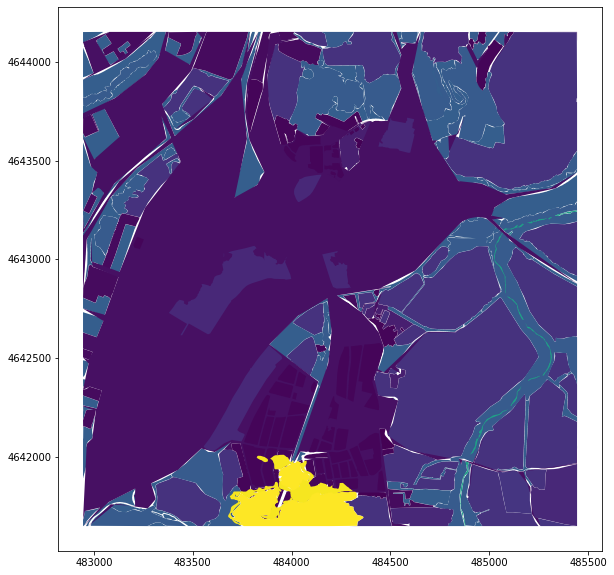

In [9]:
# conda install -c conda-forge mapclassify


from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)

# gdf.plot(column='Slabel', ax=ax, legend=True, cax=cax)
# gdf.plot(column='Slabel', ax=ax, cmap='OrRd', scheme='equal_interval')

gdf.plot(column='Slabel', ax=ax) # cmap='OrRd')

In [79]:
thick_cld =  gdf.loc[(gdf["Slabel"] == 82)]
thin_cld =  gdf.loc[(gdf["Slabel"] == 81)]
# thin_cld

In [40]:
# thick_cld

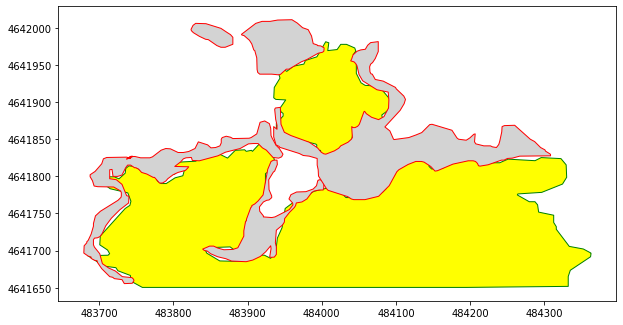

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
thick_cld.plot(ax=ax, color='yellow', edgecolor='green')
thin_cld.plot(ax=ax, color='lightgrey', edgecolor='red', alpha=1)

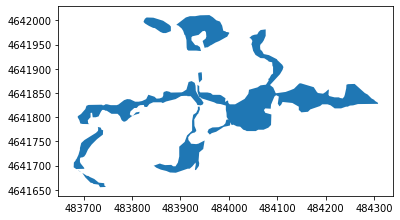

In [42]:
difference2=gpd.overlay(thin_cld,thick_cld, how='difference')
# diff=gpd.overlay(thick_cld, thin_cld, how='difference')

difference2.plot()

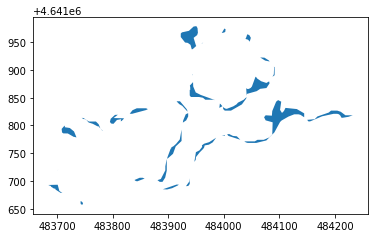

In [43]:
intersection=gpd.overlay(thin_cld,thick_cld, how='intersection')

intersection.plot()

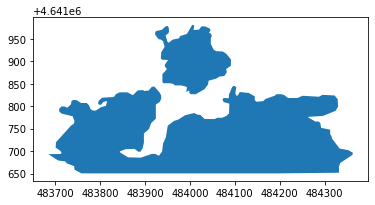

In [44]:
union=gpd.overlay(intersection,thick_cld, how='union')


union['common_column'] = 1
dissolved = union.dissolve(by='common_column')

dissolved.plot()

In [45]:
new_thick_cld= dissolved.drop(['Slabel_1', 'Plabel_1', 'Slabel_2', 'Plabel_2'], axis=1)
# new_thick_cld

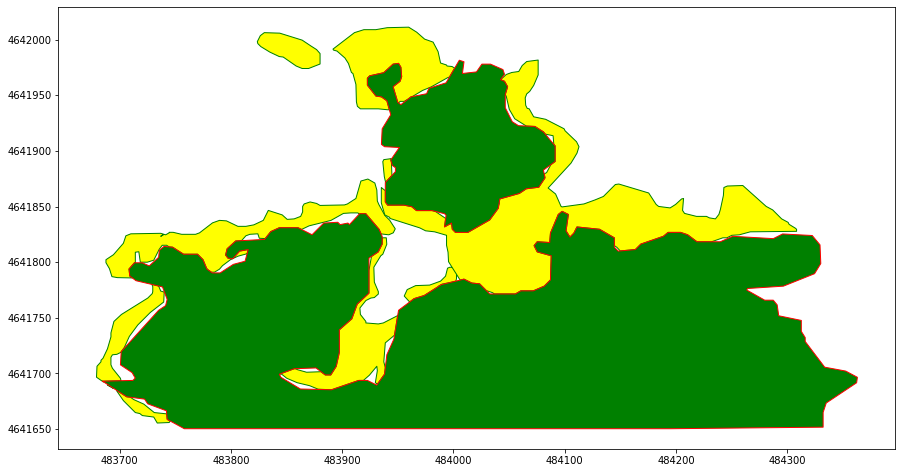

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(15, 55))
difference2.plot(ax=ax, color='yellow', edgecolor='green')
new_thick_cld.plot(ax=ax, color='green', edgecolor='red', alpha=1)

In [70]:
gdf.to_file('example.geojson')
gdf.to_file('examp.shp')

In [71]:
# converting projections
wgs84 = pyproj.Proj(projparams = 'epsg:4326')
InputGrid = pyproj.Proj(projparams = 'epsg:32631')


x1, y1 = 483742.781,4641824.138
lat, lon = pyproj.transform(InputGrid, wgs84, x1, y1)



C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  import sys


In [72]:
# dat2= 'example.geojson'
# geo = geojson.load(open(dat2))

# m = folium.Map(location = [lat, lon], tiles = "OpenStreetMap", zoom_start = 9)
# folium.features.GeoJson(geo, name="geojson", show=True).add_to(m)
# m


In [74]:
new_dataframe = difference2.append(new_thick_cld)
new_dataframe

,Slabel,Plabel,geometry
629,81.0,8.0,"MULTIPOLYGON (((483739.558 4641825.130, 483736..."
630,81.0,8.0,"POLYGON ((483941.429 4641936.884, 483932.481 4..."
631,81.0,8.0,"POLYGON ((483869.397 4641995.942, 483872.081 4..."
632,81.0,8.0,"MULTIPOLYGON (((483960.626 4641764.232, 483955..."
633,81.0,8.0,"MULTIPOLYGON (((484042.375 4641963.985, 484047..."
1,82.0,8.0,"MULTIPOLYGON (((483742.750 4641658.750, 483742..."


In [77]:
gdf_copy = gdf
new_gdf_clip = gdf_copy.drop([633,634,635,636,637,638])
new_full_gdf = new_gdf_clip.append(new_dataframe)



# fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# new_full_gdf.plot(ax=ax, color='yellow', edgecolor='green', alpha=1)

In [54]:
# new_full_gdf.to_file('exam.geojson', driver='GeoJSON')
# new_full_gdf.to_file('exam.shp')

In [78]:
shp = gpd.read_file('exam.shp')
# shp

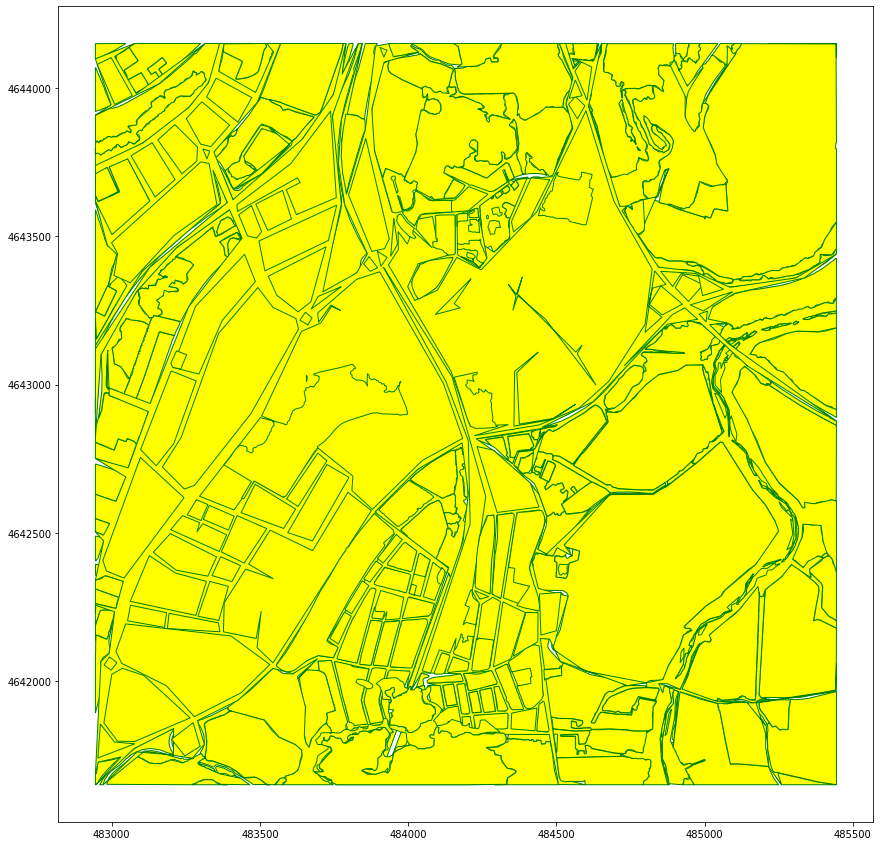

In [66]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# shp.plot(ax=ax, color='yellow', edgecolor='green', alpha=1)